In [1]:
import random
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import copy

# Traveling throug 51 cities

In [2]:
df = pd.read_csv('eil51.csv')
df.drop(['City_number'], axis=1)
L = len(df)

In [3]:
G = nx.Graph()
pos = {}
for i in range(L):
    G.add_node(i)
    pos[i]=df['X-coordinate'][i],df['Y-coordinate'][i]

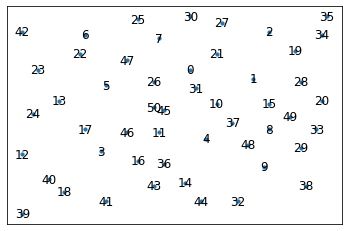

In [4]:
nx.draw_networkx(G,pos,node_size=10, node_shape = 'o')
plt.xticks()
plt.show()

### make distances matrix

In [5]:
D_matrix = [ [ 0 for i in range(L) ] for j in range(L) ]

In [6]:
for i in range(L):
    x_n1 = df['X-coordinate'][i]
    y_n1 = df['Y-coordinate'][i]
    for j in range(L):
        x_n0 = df['X-coordinate'][j]
        y_n0 = df['Y-coordinate'][j]
        d = math.sqrt((x_n1 - x_n0)**2 + (y_n1 - y_n0)**2)
#         print('the distance between city', i , ' and ', j, ' is:', d)
        D_matrix[i][j] = d

### Generate random configuration of cities in graph

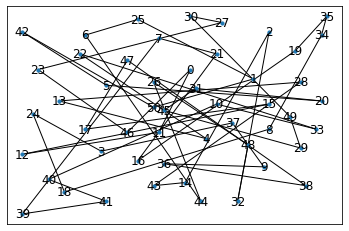

In [7]:
sequence = random.sample(range(L), L)
# Adding edges based on a random sequence
for i in range(L):
    n = sequence[i]
    m = sequence[i-1]
    G.add_edge(m,n, distance=D_matrix[m][n])
    
nx.draw_networkx(G, pos, node_size=10, node_shape = 'o')
plt.show()


### Evaluate Configuration

In [8]:
G.size(weight='distance')

1506.557301800891

### simulated annealing

In [61]:
def mutation(B):
    edges = list(B.edges)
    
    F = B.copy()
    edge_list = random.sample(edges, k= 2)
    a = edge_list[0][0]
    b = edge_list[0][1]
    c = edge_list[1][0]
    d = edge_list[1][1]
    
    F.remove_edge(a,b)
    F.remove_edge(c,d)
    F.add_edge(a,c, distance=D_matrix[a][c])
    F.add_edge(b,d, distance=D_matrix[b][d])

    while nx.is_connected(F) == False:
        F = B.copy()
        edge_list = random.sample(edges, k= 2)
        
        a = edge_list[0][0]
        b = edge_list[0][1]
        c = edge_list[1][0]
        d = edge_list[1][1]
        
        F.remove_edge(a,b)
        F.remove_edge(c,d)
        
        F.add_edge(a,c, distance=D_matrix[a][c])
        F.add_edge(b,d, distance=D_matrix[b][d])

    else: 
        return(F)
    

def simulated_annealing_TSP(G, cooling_schedule, iter):
    route = G
    markov_chain = [route]
    func_value = [route.size(weight='distance')]
    print( 'We start with a distance of', route.size(weight='distance'))
    current_route = route
    for i in range(iter):
        T = cooling_schedule[0] / np.log(i + 1 + cooling_schedule[1])
        prop_route = mutation(current_route)

        #Boltzman function
        func_eval = np.exp(-1 * (prop_route.size(weight='distance') - current_route.size(weight='distance')) / T)
        alpha = min(1, func_eval)
        u = np.random.uniform(0,1)

        if alpha > u:
            current_route = prop_route
            markov_chain.append(current_route)
            func_value.append(current_route.size(weight='distance'))
        else:
            markov_chain.append(current_route)
            func_value.append(current_route.size(weight='distance'))
            
    print( 'We end with a distance of',current_route.size(weight='distance'))
    return func_value, markov_chain

In [94]:
sequence = random.sample(range(L), L)
F = nx.create_empty_copy(G, with_data=True)
# Adding edges based on a random sequence
for i in range(L):
    n = sequence[i]
    m = sequence[i-1]
    F.add_edge(m,n, distance=D_matrix[m][n])

cooling_schedule = [40, 70]
iter = 10000
func_value, markov_chain = simulated_annealing_TSP(F, cooling_schedule, iter)

We start with a distance of 1607.644771394267
We end with a distance of 584.7659004156119


Shortes route, D = 550.27


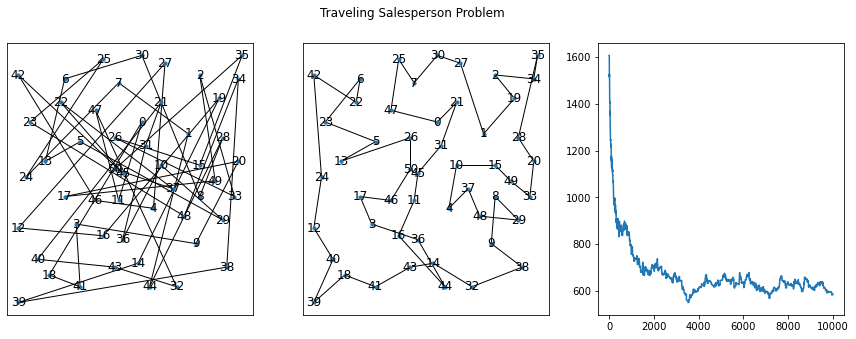

In [95]:
min_value = min(func_value) 
min_index = func_value.index(min_value) 
print('Shortes route, D =',round(min_value,2))


fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Traveling Salesperson Problem')

plt.subplot(131)
nx.draw_networkx(F, pos, node_size=10, node_shape = 'o')

plt.subplot(132)
nx.draw_networkx(markov_chain[min_index], pos, node_size=10, node_shape = 'o')

plt.subplot(133)
plt.plot(list(range(len(func_value))),func_value)
plt.show()

